# Chicago Crime Data

Chicago is one of the most populous cities in the United States. So it comes as no surprise that Chicago has one of the world's largest and most diversified economies, with more than four million employees and generating an annual gross regional product (GRP) of over $609 billion. But there's more to Chicago than just trade. Chicago is also home to several tourist attractions such as Millennium Park and Buckingham Fountain which lure in 50-60 million visitors each year. But as enchanting as Chicago may be, visiting it comes with its own hazards. The city has an annual violent crime rate of 903.8 per 100,000 people and a property crime rate of a startling  2,946.2 per 100,000 people. According to the FBI, 653 people were murdered in Chicago in 2016 alone. In such a scenario, there is a growing for travellers to be informed about the risk they may be exposing themselves to if they choose to travel to the big city. For this purpose, we have decided to use predictive analysis on Chicago's crime data to answer the pressing question: How safe is it for a person to travel to a certain area in the Chicago given the name of the name of the area and the month or day the person will arrive. Based on this information, our model will predict how susceptible the person is to fall victim to a certain crime.

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Loading the Data

Chicago Crime data was exported from Chicago Data Portal (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data). Although, the crime data from 2001 onwards was available, we chose to focus on more recent data only, namely data starting from 1st January to 2016 to 1st November 2019.

In [3]:
#Loading data
df = pd.read_csv('Crimes_-_2016_to_present.csv')
print(df.shape)

(1022547, 22)


In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11778851,JC374097,01/01/2016 12:00:00 AM,043XX S MOZART ST,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,...,15.0,58.0,17,NaN,NaN,2016,10/23/2019 04:07:44 PM,NaN,NaN,NaN
1,11768978,JC354039,01/01/2016 12:00:00 AM,088XX S MARSHFIELD AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,21.0,71.0,17,NaN,NaN,2016,10/03/2019 04:08:47 PM,NaN,NaN,NaN
2,11845914,JC454785,01/01/2016 12:00:00 AM,027XX S WHIPPLE ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,12.0,30.0,26,NaN,NaN,2016,10/01/2019 04:20:30 PM,NaN,NaN,NaN
3,11845531,JC454083,01/01/2016 12:00:00 AM,005XX E 89TH PL,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,APARTMENT,False,True,...,9.0,44.0,02,NaN,NaN,2016,10/01/2019 04:20:30 PM,NaN,NaN,NaN
4,11842829,JC449246,01/01/2016 12:00:00 AM,078XX S LOOMIS BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,17.0,71.0,11,NaN,NaN,2016,09/28/2019 04:01:29 PM,NaN,NaN,NaN


In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.022547e+06,1.022547e+06,1.022546e+06,1.022533e+06,1.022543e+06,1.011800e+06,1.011800e+06,1.022547e+06,1.011800e+06,1.011800e+06
mean,1.112166e+07,1.143117e+03,1.120272e+01,2.326465e+01,3.664313e+01,1.164883e+06,1.886460e+06,2.017423e+03,4.184404e+01,-8.767044e+01
std,6.917042e+05,6.954745e+02,6.946980e+00,1.402735e+01,2.140162e+01,1.616627e+04,3.121411e+04,1.093516e+00,8.584168e-02,5.884072e-02
min,2.224500e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,3.661945e+01,-9.168657e+01
25%,1.078513e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153208e+06,1.859327e+06,2.016000e+03,4.176935e+01,-8.771276e+01
50%,1.116318e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166703e+06,1.893856e+06,2.017000e+03,4.186443e+01,-8.766395e+01
75%,1.150531e+07,1.722000e+03,1.700000e+01,3.400000e+01,5.300000e+01,1.176452e+06,1.908723e+06,2.018000e+03,4.190531e+01,-8.762784e+01
max,1.188568e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.019000e+03,4.202267e+01,-8.752453e+01


# Data Cleaning

Since we don't need all of 22 columns for our purpose, we will drop the unnecessary ones to have a more concise data frame.

In [6]:
df=df.drop(['Case Number', 'IUCR', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Year'], axis=1)
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,11778851,01/01/2016 12:00:00 AM,043XX S MOZART ST,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,922,9.0,15.0,58.0
1,11768978,01/01/2016 12:00:00 AM,088XX S MARSHFIELD AVE,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,2221,22.0,21.0,71.0
2,11845914,01/01/2016 12:00:00 AM,027XX S WHIPPLE ST,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,1033,10.0,12.0,30.0
3,11845531,01/01/2016 12:00:00 AM,005XX E 89TH PL,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,APARTMENT,False,True,633,6.0,9.0,44.0
4,11842829,01/01/2016 12:00:00 AM,078XX S LOOMIS BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,612,6.0,17.0,71.0


Now we need to check if the dataset contains any null values. If it does, we need to decide how to cater them.

In [7]:
df.isnull().values.any()

True

In [8]:
## Finding columns with null values so they can be catered accordingly
for col in df:
    if(df[col].isnull().values.any()):
        print(col, "null value count:", df[col].isna().sum())    

Location Description null value count: 4021
District null value count: 1
Ward null value count: 14
Community Area null value count: 4


Since we are working with over 100,000 rows, the District, Ward and Community area fields with null values can be dropped without much loss and the Location Description values with null values can be filled as "Unknown" as they constitute about 4% of the rows.

In [9]:
df = df.dropna(how='any', subset=['District', 'Ward', 'Community Area'])
df["Location Description"]=df["Location Description"].replace(to_replace=np.nan, value="UNKNOWN")

Now we'll check the data type of each column and fix them if need be.

In [10]:
df.dtypes

ID                        int64
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
dtype: object

As we see above, the data types do show some obvious problems. Firstly, the 'Date' column is stored as strings. We'll convert this to the datetime data type. Secondly, the 'District', 'Ward' and 'Community Area' fields are stored as floats when ints are a better choice. A less obvious problem is that two of the columns are stored as booleans. Since it's easier plotting numeric data compared to boolean data, we'll convert the bools to 1's and 0's.

In [11]:
df["Date"]=pd.to_datetime(df["Date"])
df['Ward']=df['Ward'].astype('int64')
df['Community Area']=df['Community Area'].astype('int64')
df['District']=df['District'].astype('int64')
df['Arrest']=df['Arrest'].astype('int64')
df['Domestic']=df['Domestic'].astype('int64')
df.dtypes

ID                               int64
Date                    datetime64[ns]
Block                           object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
dtype: object

Since our analysis is based on the different times a person would like to travel to Chicago, it would be useful to form the 'Day', 'Month' and 'Year' columns from our 'Date' field.

In [12]:
df["Day"]=(df["Date"].dt.day)
df["Month"]=(df["Date"].dt.month)
df["Year"]=(df["Date"].dt.year)

Now we'll check if the dataset contains any duplicate rows. If found, we'll remove them.

In [13]:
duplicate = df[df.duplicated(keep='first')]
print("Duplicate Rows:")
print(duplicate)
#No duplicates found

Duplicate Rows:
Empty DataFrame
Columns: [ID, Date, Block, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, Day, Month, Year]
Index: []


Now we'll use box and whisker plots to spot if our 'Beat', 'District', 'Ward' or 'Community Area' fields have any alarming outliers such as negative values or 0 values.

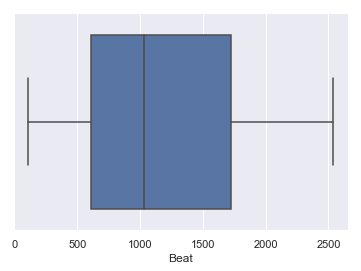

In [14]:
sns.boxplot(x=df["Beat"])

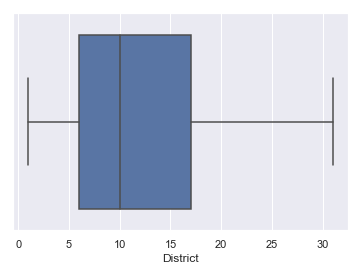

In [15]:
sns.boxplot(x=df["District"])

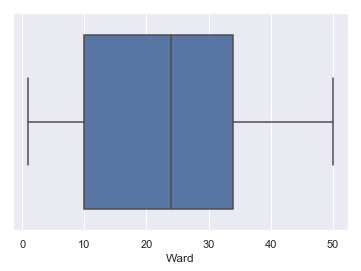

In [16]:
sns.boxplot(x=df["Ward"])

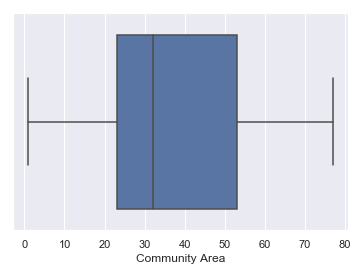

In [17]:
sns.boxplot(x=df["Community Area"])

Since we know modern day Chicago has 25 police districts (according to https://home.chicagopolice.org/community/districts/) and 77 community areas (according to https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2), let's confirm there aren't more than 25 distinct district areas and 77 distinct community areas in our dataset.

In [18]:
print("Total number of unique districts in our dataset is", df['District'].nunique())
print("Total number of unique community areas in our dataset is", df['Community Area'].nunique())
#inserting total population per community 
db = pd.read_csv('census_data.csv')
db[" Total population"] = db[" Total population"].str.replace(",","")



Total number of unique districts in our dataset is 23
Total number of unique community areas in our dataset is 77


In [19]:
#save the dataset 
df.to_pickle('Crimes_-_2016_to_present.pkl')

In [20]:

### run from this cell after the first time
import pickle
with open('Crimes_-_2016_to_present.pkl', 'rb') as f:
    data = pickle.load(f)
df = data

# Exploratory Data Analysis

In [21]:
#Chicago has 77 comminity areas. Grouping by them:

df["Total Number of Crime Instances"]=1
count_by_community=df.groupby('Community Area').sum()[["Total Number of Crime Instances"]]
newdf = count_by_community.sort_values(["Community Area"])
newdf
data.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Day,Month,Year,Total Number of Crime Instances
0,11778851,2016-01-01,043XX S MOZART ST,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,0,1,922,9,15,58,1,1,2016,1
1,11768978,2016-01-01,088XX S MARSHFIELD AVE,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,0,2221,22,21,71,1,1,2016,1
2,11845914,2016-01-01,027XX S WHIPPLE ST,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,0,1,1033,10,12,30,1,1,2016,1
3,11845531,2016-01-01,005XX E 89TH PL,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,APARTMENT,0,1,633,6,9,44,1,1,2016,1
4,11842829,2016-01-01,078XX S LOOMIS BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,0,0,612,6,17,71,1,1,2016,1


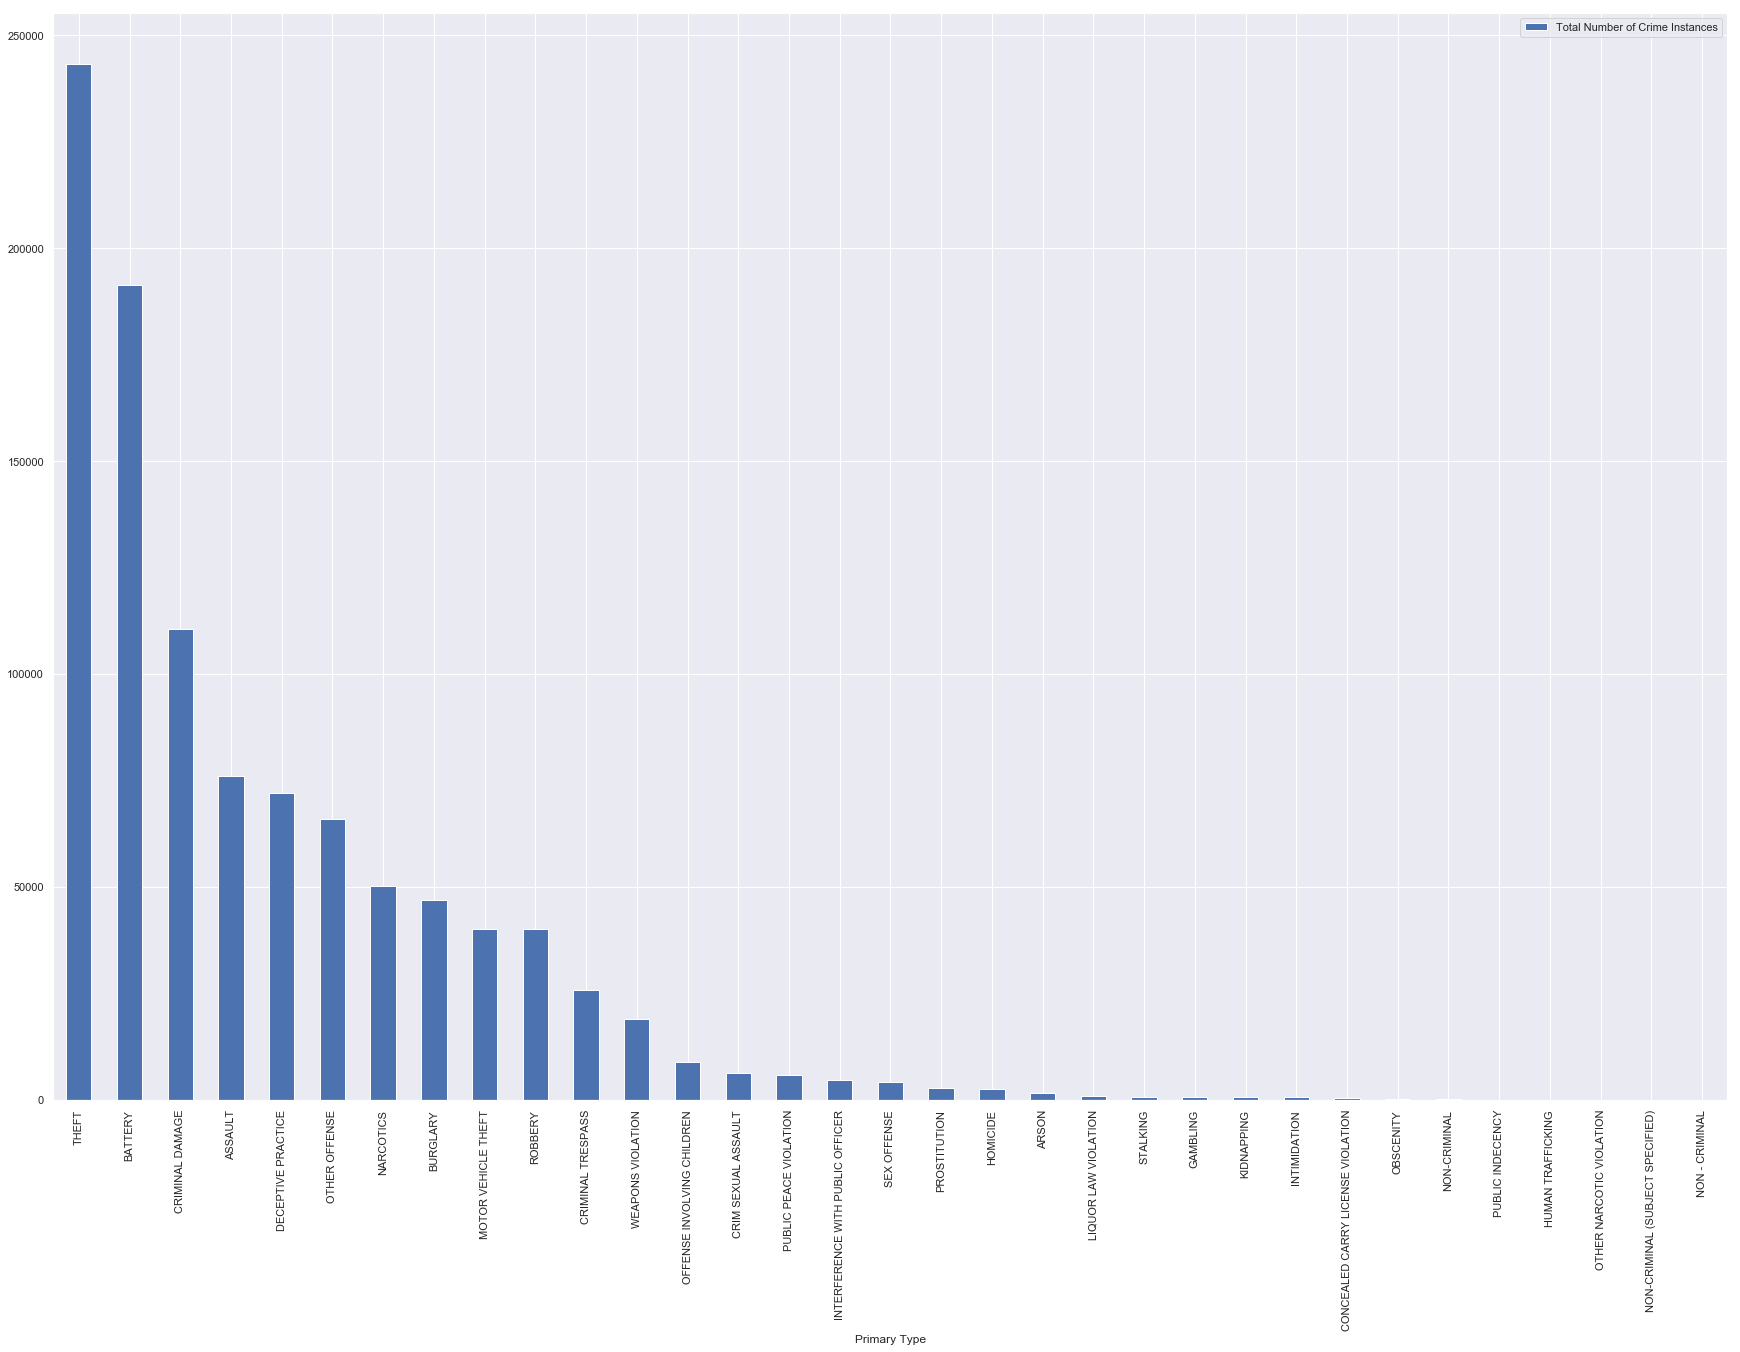

In [22]:
#Grouping by crime type
count_by_community=df.groupby('Primary Type').sum()[["Total Number of Crime Instances"]]
count_by_community = count_by_community.sort_values(["Total Number of Crime Instances"], ascending=False)

count_by_community.plot.bar(width = 0.5 , figsize = (30,20),color = "b")

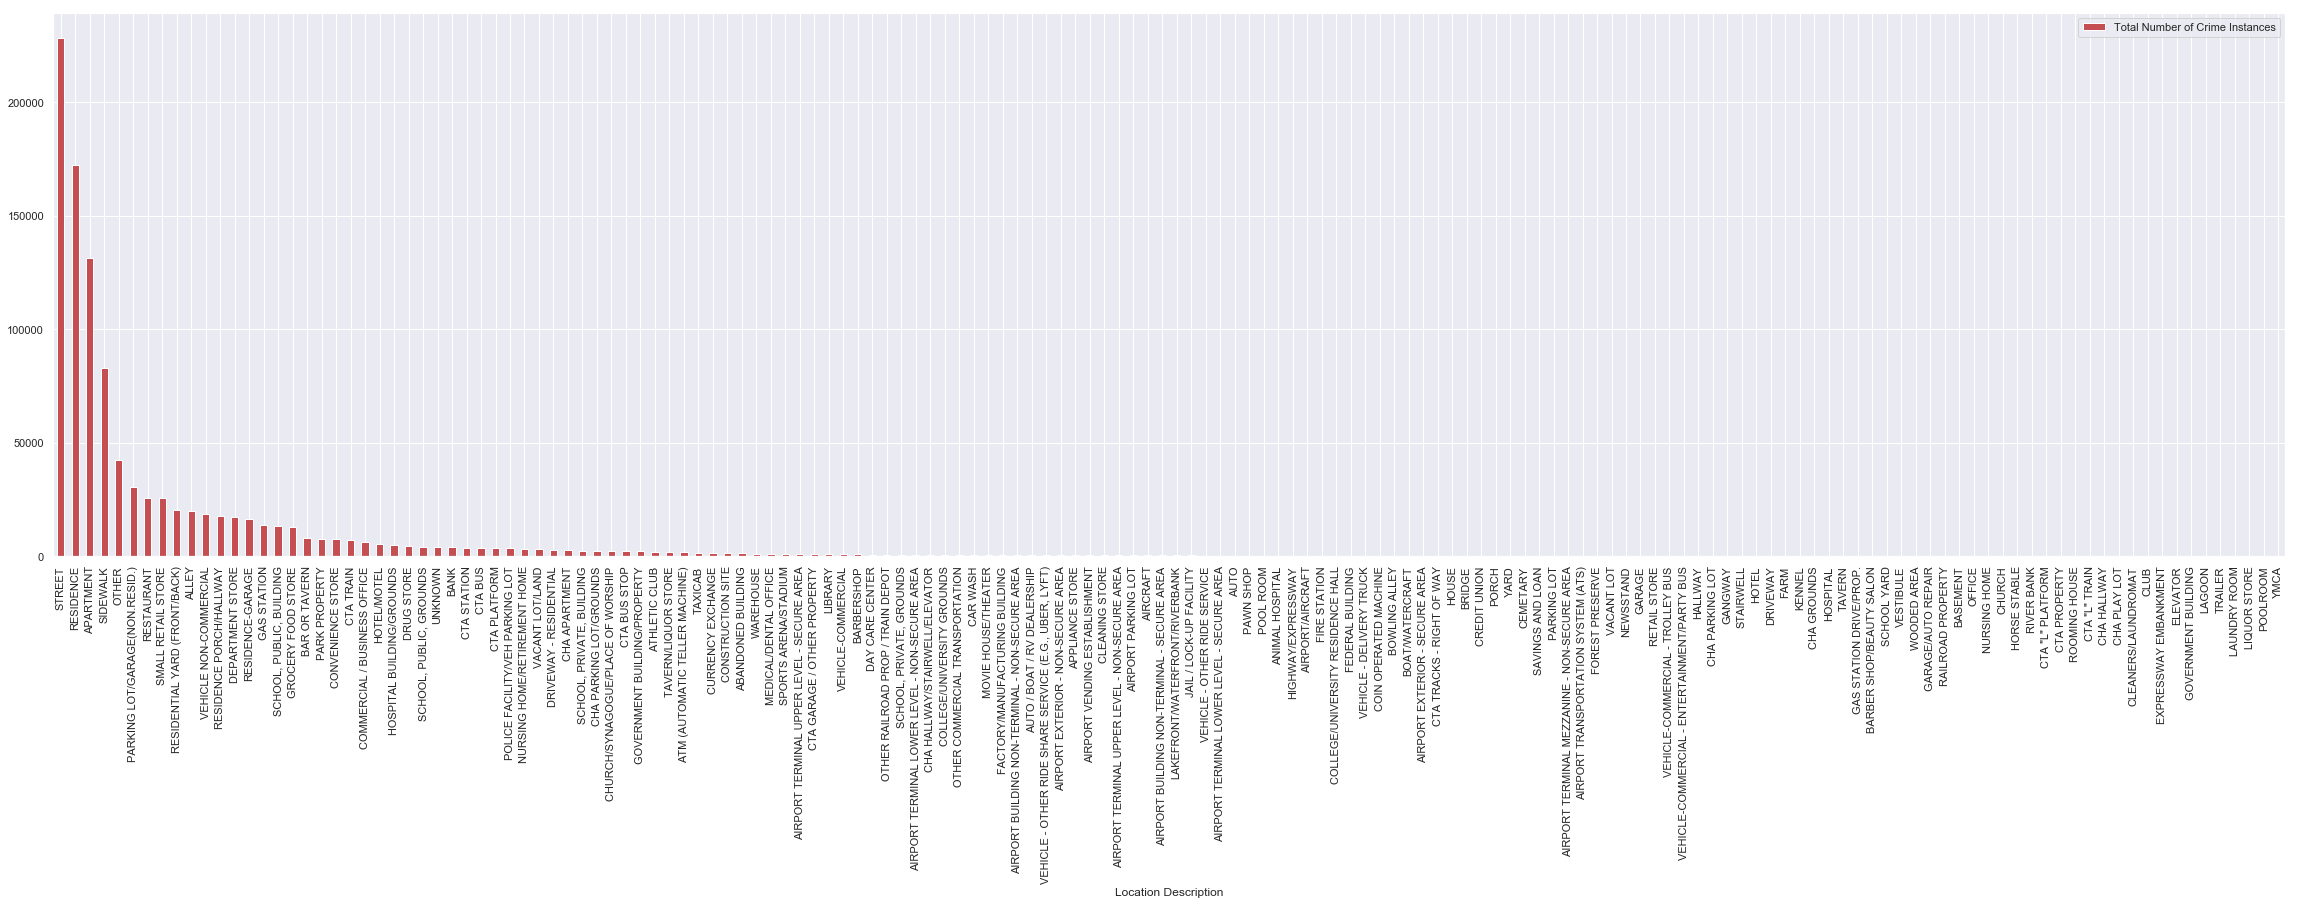

In [24]:
#Grouping by crime type
count_by_community = df.groupby("Location Description").sum()[["Total Number of Crime Instances"]]
be = count_by_community.sort_values(["Total Number of Crime Instances"], ascending=False)
be.plot.bar(width = 0.5 , figsize = (40,10),color = "r")

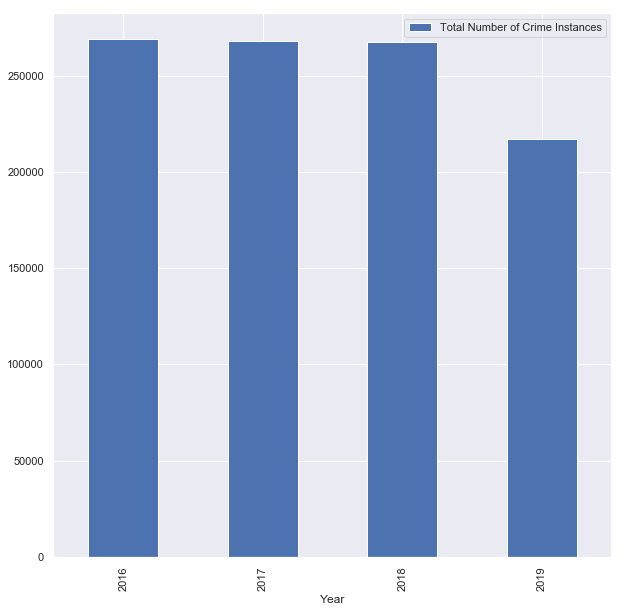

In [25]:
#Grouping by crime type
count_by_community=df.groupby('Year').sum()[["Total Number of Crime Instances"]]
be = count_by_community.sort_values(["Total Number of Crime Instances"], ascending=False)
be.plot.bar(width = 0.5 , figsize = (10,10),color = "b")

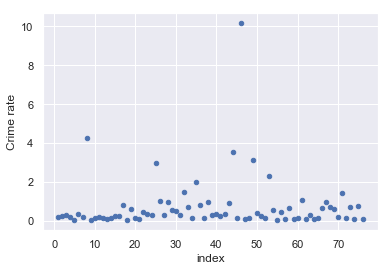

In [27]:
db[" Total population"] = db[" Total population"].astype('int64')
newdf["Crime rate"] = newdf["Total Number of Crime Instances"].divide(db[ " Total population"])
newdf["index"] = newdf.index

newdf = newdf.sort_values(["Crime rate"],ascending = False )
newdf.plot.scatter(x ="index", y = "Crime rate", c = "b" )

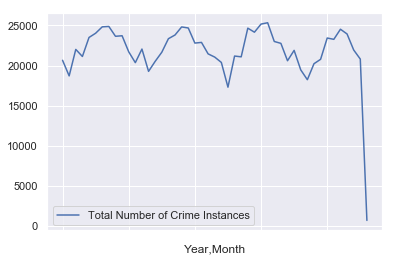

In [28]:
df.head()
df["my_months"] = pd.DatetimeIndex(df["Date"]).month
df.head()
be = df.groupby(["Year","Month"]).sum()[["Total Number of Crime Instances"]]
colors = plt.cm.tab20(np.linspace(0, 1, 12))

be.plot()#.bar(width = 0.5 , figsize = (30,10),color = colors)